## Evaluate individuals' continuous ratings

Zizhuang Miao

This script is used to evaluate each individual's continuous ratings compared with the average/median of all the other individuals. The goal is to identify (potentially) "bad" data and exclude them from further analysis and prevent them from contaminating the group-level summary statistics. Specifically, correlations between each participant and the rest of all participants are used to evaluate the data quality of each participant.

In [2]:
import pandas as pd
import numpy as np
from os.path import join
import statsmodels.api as sm
from scipy.stats import ttest_ind

### Social interactions

In [2]:
dataDir = 'C:\\'
outputDir = 'C:\\'

allData_social = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_social_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_social = pd.concat([allData_social, trialData], ignore_index=True)

In [4]:
np.unique(allData_social['ID']).shape

(114,)

Correlations

In [3]:
subList = list(np.unique(allData_social['ID']))

# calculate correlations
corr_mean = []
corr_median = []

for sub in subList:
    subData = allData_social[allData_social['ID']==sub]
    subData.columns = ['ID', 'time', 'sub_rating']
    otherData = allData_social[allData_social['ID']!=sub]
    otherData_mean = otherData.groupby('time')['rating'].mean()
    otherData_mean = otherData_mean.reset_index()
    otherData_median = otherData.groupby('time')['rating'].median()
    otherData_median = otherData_median.reset_index()

    meanData = pd.merge(subData, otherData_mean, on='time')
    medianData = pd.merge(subData, otherData_median, on='time')    # merge the two dataframes to match time points
    corr_mean.append(meanData['sub_rating'].corr(meanData['rating']))
    corr_median.append(medianData['sub_rating'].corr(medianData['rating']))

outputDf = pd.DataFrame({'ID': subList, 'corr_mean': corr_mean, 'corr_median': corr_median})
outputDf.to_csv(join(outputDir, 'correlation_social_continuous.csv'),  index=False)

Visualizations

Text(0, 0.5, 'Social interactions')

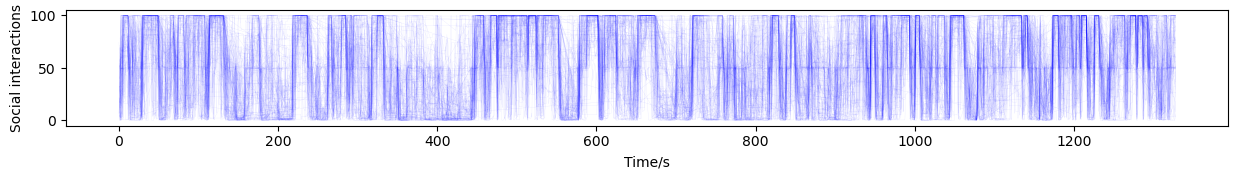

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

subList = list(np.unique(allData_social['ID']))

# visualization
f1, ax = plt.subplots(figsize=(15, 1.5))

for sub in subList:
    subData = allData_social[allData_social['ID']==sub]
    sns.lineplot(data=subData, x='time', y='rating', ax=ax, color='blue', linewidth=0.2, alpha=0.1)
ax.set_xlabel('Time/s')
ax.set_ylabel('Social interactions')

In [8]:
allData_social['rating'].mean()

57.04215992048136

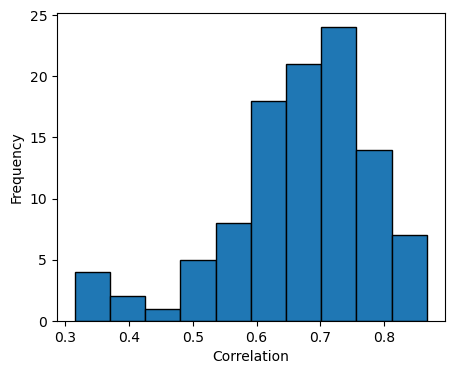

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = pd.read_csv(join(outputDir, 'correlation_social_continuous.csv'))
correlation = correlation[correlation['corr_mean']>=0.3]
plt.figure(figsize=(5,4))
plt.hist(correlation['corr_mean'], edgecolor='black')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.savefig('C:\\Users\\f006fkn\\Desktop\\SpacetopNarrativesStudy\\projects_crowdsourcing_social-tom\\results_analysis\\figures\\corr_social_con_group-hist.svg')

In [7]:
correlation['corr_mean'].median()

0.6922396430640017

In [17]:
f1.savefig(join(outputDir, 'social_all.svg'))

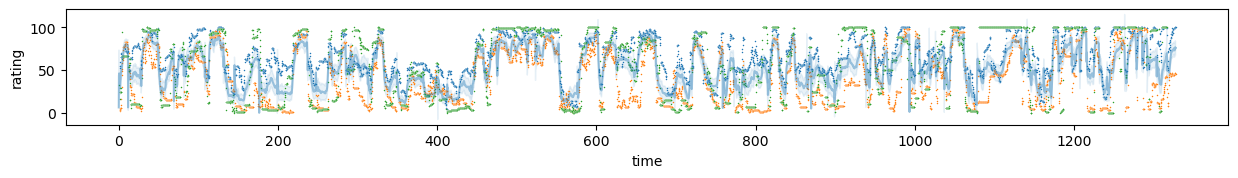

In [38]:
goodSub = ['sub-021', 'sub-115', 'sub-097']

f2, ax = plt.subplots(figsize=(15, 1.5))

means = allData_social.groupby('time')['rating'].mean()
std = allData_social.dropna().groupby('time')['rating'].apply(np.std)
nValid = allData_social.groupby('time').count()
ci = std/np.sqrt(nValid['rating']) * 1.96    
sns.lineplot(x=means.index, y=means.values, ax=ax, alpha=0.4)
ax.fill_between(means.index, (means-ci).values, (means+ci).values, color='#2178B5', alpha=0.1)

for sub in goodSub:
    subData = allData_social[allData_social['ID']==sub]
    sns.scatterplot(data=subData, x='time', y='rating', ax=ax, s=1.2)

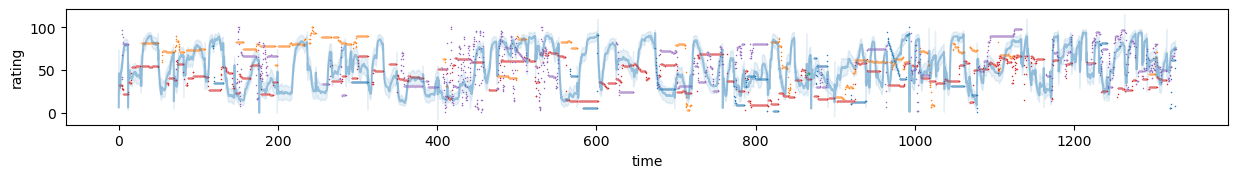

In [39]:
badSub = ['sub-066', 'sub-107', 'sub-045', 'sub-117', 'sub-110']

f3, ax = plt.subplots(figsize=(15, 1.5))

sns.lineplot(x=means.index, y=means.values, ax=ax, alpha=0.4)
ax.fill_between(means.index, (means-ci).values, (means+ci).values, color='#2178B5', alpha=0.1)

for sub in badSub:
    subData = allData_social[allData_social['ID']==sub]
    sns.scatterplot(data=subData, x='time', y='rating', ax=ax, s=1.2)

### Theory of mind

In [3]:
dataDir = 'C:\\'
outputDir = 'C:\\'

allData_tom = pd.DataFrame()
lastTimePoint = []

# get all data concatenated
for n in range(1,9):
    for s in range(1,10):
        trialData = pd.read_csv(join(dataDir, "continuous_tom_1a2a3a4a_long", f"narrative{n}situation{s}.csv"))
        if not (n == 1 and s == 1):
            trialData['time'] += 0.23
            trialData['time'] += lastTimePoint[-1]
        lastTimePoint.append(trialData.iloc[-1, 1])
        allData_tom = pd.concat([allData_tom, trialData], ignore_index=True)

Correlations

In [9]:
subList = list(np.unique(allData_tom['ID']))

# calculate correlations
corr_mean = []
corr_median = []

for sub in subList:
    subData = allData_tom[allData_tom['ID']==sub]
    subData.columns = ['ID', 'time', 'sub_rating']
    otherData = allData_tom[allData_tom['ID']!=sub]
    otherData_mean = otherData.groupby('time')['rating'].mean()
    otherData_mean = otherData_mean.reset_index()
    otherData_median = otherData.groupby('time')['rating'].median()
    otherData_median = otherData_median.reset_index()

    meanData = pd.merge(subData, otherData_mean, on='time')
    medianData = pd.merge(subData, otherData_median, on='time')    # merge the two dataframes to match time points
    corr_mean.append(meanData['sub_rating'].corr(meanData['rating']))
    corr_median.append(medianData['sub_rating'].corr(medianData['rating']))

outputDf = pd.DataFrame({'ID': subList, 'corr_mean': corr_mean, 'corr_median': corr_median})
outputDf.to_csv(join(outputDir, 'correlation_tom_continuous.csv'),  index=False)

Visualizations

Text(0, 0.5, 'Theory of mind')

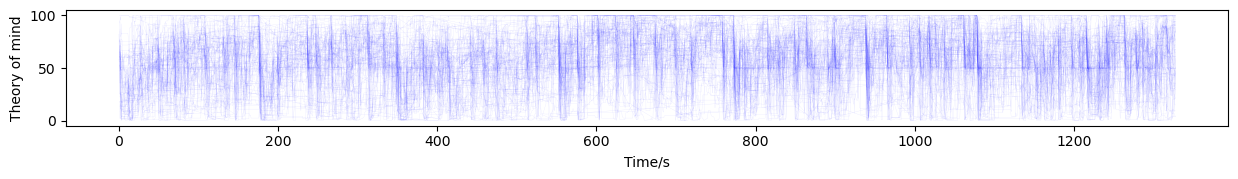

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

subList = np.unique(allData_tom['ID'])

# visualization
f1, ax = plt.subplots(figsize=(15, 1.5))

for sub in subList:
    subData = allData_tom[allData_tom['ID']==sub]
    sns.lineplot(data=subData, x='time', y='rating', ax=ax, color='blue', linewidth=0.2, alpha=0.1)
ax.set_xlabel('Time/s')
ax.set_ylabel('Theory of mind')

In [5]:
allData_tom['rating'].mean()

58.24902381870703

In [20]:
f1.savefig(join(outputDir, 'tom_all.svg'))

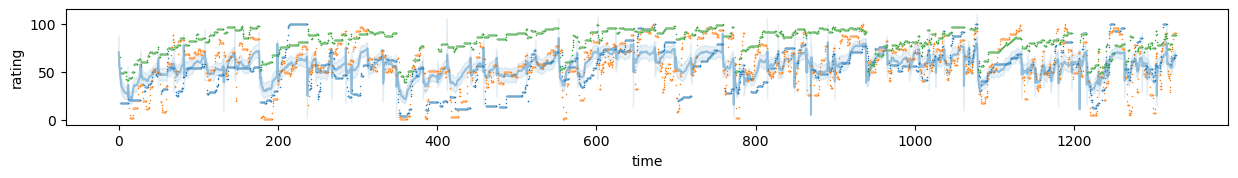

In [37]:
goodSub = ['sub-051', 'sub-077', 'sub-014']

f2, ax = plt.subplots(figsize=(15, 1.5))

means = allData_tom.groupby('time')['rating'].mean()
std = allData_tom.dropna().groupby('time')['rating'].apply(np.std)
nValid = allData_tom.groupby('time').count()
ci = std/np.sqrt(nValid['rating']) * 1.96    
sns.lineplot(x=means.index, y=means.values, ax=ax, alpha=0.4)
ax.fill_between(means.index, (means-ci).values, (means+ci).values, color='#2178B5', alpha=0.1)

for sub in goodSub:
    subData = allData_tom[allData_tom['ID']==sub]
    sns.scatterplot(data=subData, x='time', y='rating', ax=ax, s=1.2)

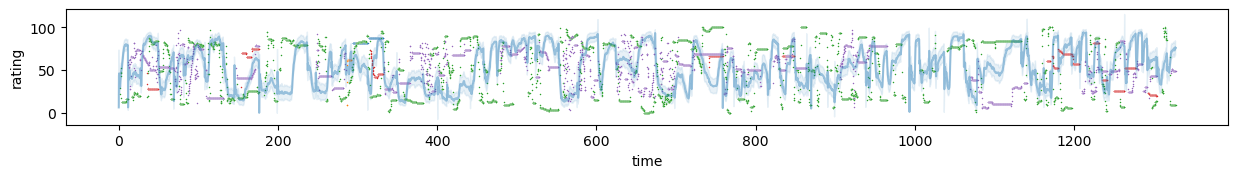

In [40]:
badSub = ['sub-050', 'sub-068', 'sub-034', 'sub-125', 'sub-116']

f3, ax = plt.subplots(figsize=(15, 1.5))

sns.lineplot(x=means.index, y=means.values, ax=ax, alpha=0.4)
ax.fill_between(means.index, (means-ci).values, (means+ci).values, color='#2178B5', alpha=0.1)

for sub in badSub:
    subData = allData_tom[allData_tom['ID']==sub]
    sns.scatterplot(data=subData, x='time', y='rating', ax=ax, s=1.2)